In [21]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from proj1_helpers import *
from implementations import *
from helpers import *
from data_manager import *
from runners import *
from plot import *

In [18]:
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

### Test consol

Score: % 65.53999999999999
Score: % 65.53999999999999


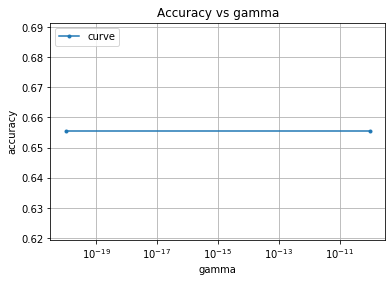

In [169]:
# Data processing -> part you can play with
My_options = ['nanmed', 'bound', 'std', 'prb']

# If you use jets
#jets_y, jets_tX, _ = cat_variables(y, tX, ids)
#y, tX = jets_y[3], jets_tX[3]

#Split (split=True) or cross (split=False)
split = False
ratio = 0.8
seed = 1


# Parameters -> part you can play with
# Every parameter needs to be in a list (if np.array write inside brackets por favor)
degrees = []
gammas = [np.logspace(-20, -10, 2)]
lambdas = []
method = logistic_regression

# Gradient parameters, indicate if you are using a gradient method (True/False)
Grad_method = True
max_iter = 1000
w_init = []

'''Everything above can be modified'''
#************************************************************************************************
'''Everything under should not be modified'''

y, tX = process_data(y, tX, My_options)
y_tr, x_tr, y_te, x_te = split_data(y, tX, ratio, seed)
grad = [Grad_method, w_init, max_iter]

# Run-run-run
if split:
    weights, losses = optimization(y_tr, x_tr, method, degrees, gammas, lambdas, grad)
else:
    weights, losses = optimization_cross(y, tX, method, degrees, gammas, lambdas, grad)


# Plot-plot-plot

logistic = False 

if 'prb' in My_options:
    logistic = True
    
if len(weights) == 1:
    if len(degrees[0]) == 1:
        x_te = build_poly(x_te, degrees[0][0])
    test_score(y_te, x_te, weights[0])
elif lambdas :
    if len(lambdas[0]) == 1:
        plot_my_values(weights, y_te, x_te, degrees, gammas, [], logistic)
elif degrees : 
    if len(degrees[0]) == 1:
        x_te = build_poly(x_te, degrees[0][0])
        plot_my_values(weights, y_te, x_te, [], gammas, lambdas, logistic)
else :
    plot_my_values(weights, y_te, x_te, degrees, gammas, lambdas, logistic)

### Main 1

In [30]:
def test_main():
    ''' TEST ALL RAW METHODS '''
    
    # Load train and test data
    DATA_TRAIN_PATH = "../data/train.csv"
    y, tx, ids = load_csv_data(DATA_TRAIN_PATH)
    
    print('Data loaded')
    
    methods = ['least_square_GD', 
               'least_square_SGD', 
               'least_squares', 
               'ridge_regression', 
               'logistic_regression', 
               'reg_logistic_regression']
    
    scores = []
    
    for method in methods:
        scores.append(test(y, tx, method))

    
    index = np.argmax(scores)   
    print('Best method is ', methods[index], ': score = ', scores[index])
    
test_main()

Data loaded
least square GD learning ongoing...
Score: % 70.748
least square SGD learning ongoing...
Score: % 69.452
least square learning ongoing...
Score: % 74.688
ridge learning ongoing...
Score: % 74.688
logistic regression learning ongoing...
Score: % 75.1365
reg logistic regression learning ongoing...
Score: % 75.09
Best method is  logistic_regression : score =  0.751365


### Jet values

In [179]:
def jet_ski(y, tX, methods, parameters):
    ratio = 0.8
    seed = 1
    
    pred = []
    Y =[]
    
    
    
    jets_y, jets_tX, _ = cat_variables(y, tX, ids)
    
    My_options = ['nanmed', 'bound', 'zerovar','std']
    
    for ind in range(len(jets_y)):
        jets_y[ind], jets_tX[ind] = process_data(jets_y[ind], jets_tX[ind], My_options)
        cross_terms_tx_train = build_cross_terms(jets_tX[ind])
        jets_tX[ind] = build_poly(tX,6)
        print(jets_tX[ind].shape, cross_terms_tx_train.shape)
        final_tX = np.c_[jets_tX[ind], cross_terms_tx_train]
        
        y_tr, x_tr, y_te, x_te = split_data(jets_y[ind], final_tX, ratio, seed)
       
        #w_initial = np.zeros(x_tr.shape[1])
        param = [y_tr, x_tr]
        P = param + parameters

        w,loss = test_methods(methods, P)
        
        #pred_train = predict(x_tr, w)
        pred_test = predict(x_te, w)
        print("index", ind)
        print("validation accuracy : ", np.sum(pred_test==y_te)/pred_test.shape[0])
        
        pred.append(pred_test)
        Y.append(y_te)
    
    pred =np.concatenate(pred, 0)
    Y = np.concatenate(Y,0)
    
    print("total accuracy :", np.sum(pred==Y)/pred.shape[0])
    
#max_iters = 5000
#gamma = 2.89e-10
gammas = np.logspace(-12, -8, 10)

   
#jet_ski(y, tX, ridge_regression, parameters)
    

for gamma_ in gammas: 
    print("gamma = ", gamma_)
    parameters = [gamma_]
    jet_ski(y, tX, ridge_regression, parameters)


gamma =  1e-12
(250000, 181) (99913, 153)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 250000 and the array at index 1 has size 99913

In [399]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [365]:
def jet_ski(y, tX,ids,y_test,tX_test,ids_test, methods, parameters):
    ratio = 0.8
    seed = 1
    
    pred = []
    id_t =[]
    Y =[]
    tX = build_poly(tX,2)
    tX_test = build_poly(tX_test,2)
    
    
    jets_y, jets_tX, _ = cat_variables(y, tX, ids)
    jets_y_test, jets_tX_test, id_test = cat_variables(y_test, tX_test, ids_test)
    
    
    My_options = ['nanmed', 'bound', 'zerovar','std']
    
    for ind in range(len(jets_y)):
        print('Analyzing jet {}'.format(ind))
        jets_y[ind], jets_tX[ind] = process_data(jets_y[ind], jets_tX[ind], My_options)
        jets_y_test[ind], jets_tX_test[ind] = process_data(jets_y_test[ind], jets_tX_test[ind], My_options)


        cross_terms_tx_train = build_cross_terms(jets_tX[ind])
        final_tX_train = np.c_[jets_tX[ind], cross_terms_tx_train]
        
        cross_terms_tx_test = build_cross_terms(jets_tX_test[ind])
        final_tX_test = np.c_[jets_tX_test[ind], cross_terms_tx_test]

        param = [jets_y[ind], final_tX_train]
        P = param + parameters

        w,loss = test_methods(methods, P)
        
        pred_test = predict(final_tX_test,w)
        
        pred.append(pred_test)
        id_t.append(id_test[ind])
        
        Y.append(jets_y_test[ind])

 
    
    pred =np.concatenate(pred, 0)
    id_t =np.concatenate(id_t,0)
    Y =np.concatenate(Y,0)

    print("total accuracy :", np.sum(pred==Y)/pred.shape[0])


    OUTPUT_PATH = "submissionfloflo.csv"    
    
    create_csv_submission(id_t, pred, OUTPUT_PATH)
#max_iters = 5000
gamma = 2.89e-10

   
parameters = [gamma]


jet_ski(y, tX,ids,y_test,tX_test,ids_test, ridge_regression, parameters)
    

Analyzing jet 0
Analyzing jet 1
Analyzing jet 2
Analyzing jet 3
total accuracy : 0.3039430661096231
